<a href="https://colab.research.google.com/github/Awantika3/DScode/blob/master/song_popularity_prediction_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Popularity Prediction on 19,000 spotify songs using machine learning.

Music industry is a huge industry with a huge involvement of resources. It became very important  to predict that something might be popular beforehand because of a growing competetion and involvement of huge resources. Not only music industry but also for other industries this can be a very important research subject. This dataset contains 19,000 songs which has 15 features.

dataset kaggle: https://www.kaggle.com/edalrami/19000-spotify-songs



## import library

In [1]:
!apt-get install python-pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pyparsing
Suggested packages:
  python-pyparsing-doc
The following NEW packages will be installed:
  python-pydot python-pyparsing
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 71.7 kB of archives.
After this operation, 347 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pyparsing all 2.2.0+dfsg1-2 [52.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot all 1.2.3-1 [19.6 kB]
Fetched 71.7 kB in 0s (147 kB/s)
Selecting previously unselected package python-pyparsing.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../python-pyparsing_2.2.0+dfsg1-2_all.deb ...
Unpacking python-pyparsing (2.2.0+dfsg1-2) ...
Selecting previously unselected package python-pydot.
Preparing to unp

In [2]:
!pip install pydotplus

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import io
from IPython.display import Image
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [4]:
data = pd.read_csv('song_data.csv')
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
data.loc[data['song_popularity'] < 57, 'song_popularity'] = 0 
data.loc[data['song_popularity'] >= 57, 'song_popularity'] = 1
data.loc[data['song_popularity'] == 1]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,1,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,1,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,1,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,1,216933,0.02640,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
5,Bring Me To Life,1,235893,0.00895,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,Build Me Up From Bones,1,216173,0.86200,0.515,0.286,0.000069,5,0.1060,-11.776,1,0.0378,115.076,4,0.284
18829,I Know,1,195106,0.39500,0.644,0.523,0.000000,4,0.0930,-7.660,1,0.0378,95.966,4,0.445
18830,Let It Breathe,1,159645,0.89300,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,1,205666,0.76500,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265


## Ploting Graph

In [0]:
magenta_yellow = ["m", "y"]
palette = sns.color_palette(magenta_yellow)
sns.set_palette(palette)

In [0]:
song_pop_tempo = data[data['song_popularity']==1]['tempo']
song_not_pop_tempo = data[data['song_popularity']==0]['tempo']

song_pop_song_duration_ms = data[data['song_popularity']==1]['song_duration_ms']
song_not_pop_song_duration_ms = data[data['song_popularity']==0]['song_duration_ms']

song_pop_acousticness = data[data['song_popularity']==1]['acousticness']
song_not_pop_acousticness = data[data['song_popularity']==0]['acousticness']

song_pop_danceability = data[data['song_popularity']==1]['danceability']
song_not_pop_danceability = data[data['song_popularity']==0]['danceability']

song_pop_energy = data[data['song_popularity']==1]['energy']
song_not_pop_energy = data[data['song_popularity']==0]['energy']

song_pop_liveness = data[data['song_popularity']==1]['liveness']
song_not_pop_liveness = data[data['song_popularity']==0]['liveness']

song_pop_loudness = data[data['song_popularity']==1]['loudness']
song_not_pop_loudness = data[data['song_popularity']==0]['loudness']

song_pop_speechiness = data[data['song_popularity']==1]['speechiness']
song_not_pop_speechiness = data[data['song_popularity']==0]['speechiness']

song_pop_audio_valence = data[data['song_popularity']==1]['audio_valence']
song_not_pop_audio_valence = data[data['song_popularity']==0]['audio_valence']

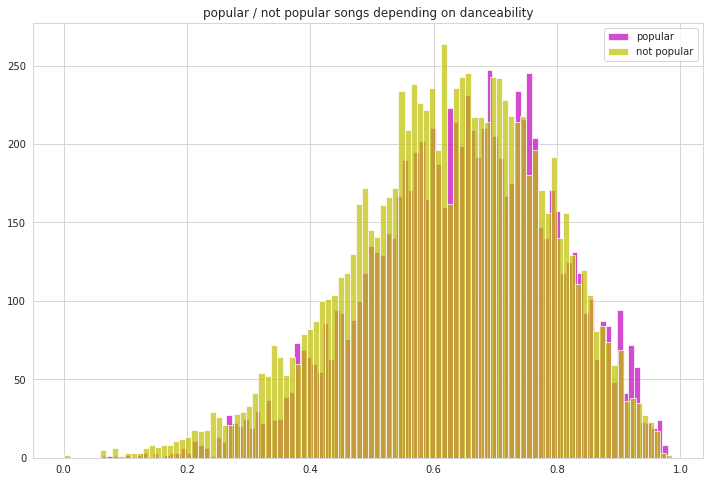

In [21]:
fig = plt.figure(figsize=(12,8))
plt.title("popular / not popular songs depending on danceability")
song_pop_danceability.hist(alpha = 0.7, bins = 100, label = 'popular')
song_not_pop_danceability.hist(alpha = 0.7, bins = 100, label = 'not popular')
plt.legend(loc = "upper right")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versio

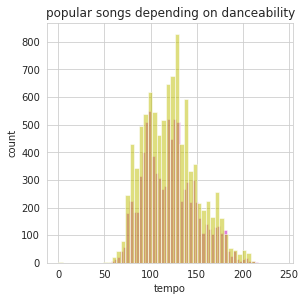

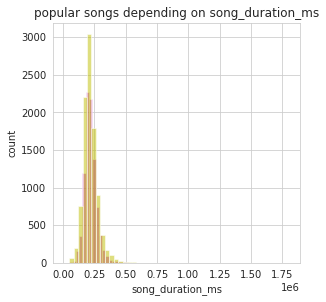

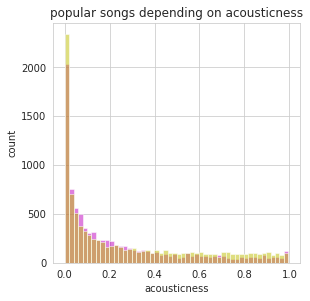

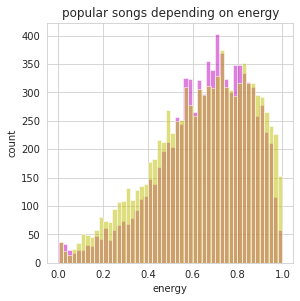

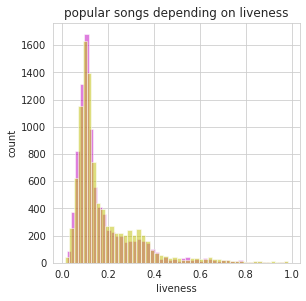

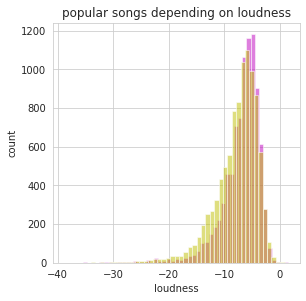

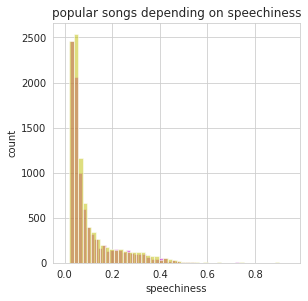

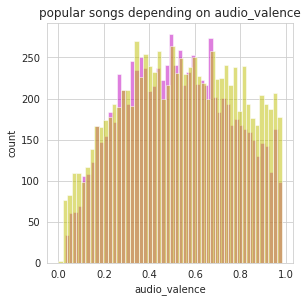

In [9]:
fig2 = plt.figure(figsize=(15,15))
#tempo
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('tempo')
ax3.set_ylabel('count')
ax3.set_title('popular songs depending on danceability')
song_pop_tempo.hist(alpha=0.5, bins=50, label = 'popular')
ax4 = fig2.add_subplot(331)
song_not_pop_tempo.hist(alpha=0.5, bins=50, label = 'not popular')

fig3 = plt.figure(figsize=(15,15))
#song_duration_ms
ax5 = fig3.add_subplot(332)
ax5.set_xlabel('song_duration_ms')
ax5.set_ylabel('count')
ax5.set_title('popular songs depending on song_duration_ms')
song_pop_song_duration_ms.hist(alpha=0.5, bins=50, label = 'popular')
ax6 = fig3.add_subplot(332)
song_not_pop_song_duration_ms.hist(alpha=0.5, bins=50, label = 'not popular')

fig4 = plt.figure(figsize=(15,15))
#acousticness
ax7 = fig4.add_subplot(333)
ax7.set_xlabel('acousticness')
ax7.set_ylabel('count')
ax7.set_title('popular songs depending on acousticness')
song_pop_acousticness.hist(alpha=0.5, bins=50, label = 'popular')
ax8 = fig4.add_subplot(333)
song_not_pop_acousticness.hist(alpha=0.5, bins=50, label = 'not popular')

fig5 = plt.figure(figsize=(15,15))
#energy
ax9 = fig5.add_subplot(334)
ax9.set_xlabel('energy')
ax9.set_ylabel('count')
ax9.set_title('popular songs depending on energy')
song_pop_energy.hist(alpha=0.5, bins=50, label = 'popular')
ax10 = fig5.add_subplot(334)
song_not_pop_energy.hist(alpha=0.5, bins=50, label = 'not popular')

fig6 = plt.figure(figsize=(15,15))
#liveness
ax11 = fig6.add_subplot(335)
ax11.set_xlabel('liveness')
ax11.set_ylabel('count')
ax11.set_title('popular songs depending on liveness')
song_pop_liveness.hist(alpha=0.5, bins=50, label = 'popular')
ax12 = fig6.add_subplot(335)
song_not_pop_liveness.hist(alpha=0.5, bins=50, label = 'not popular')

fig7 = plt.figure(figsize=(15,15))
#loudness
ax13 = fig7.add_subplot(336)
ax13.set_xlabel('loudness')
ax13.set_ylabel('count')
ax13.set_title('popular songs depending on loudness')
song_pop_loudness.hist(alpha=0.5, bins=50, label = 'popular')
ax14 = fig7.add_subplot(336)
song_not_pop_loudness.hist(alpha=0.5, bins=50, label = 'not popular')

fig8 = plt.figure(figsize=(15,15))
#speechiness
ax14 = fig8.add_subplot(337)
ax14.set_xlabel('speechiness')
ax14.set_ylabel('count')
ax14.set_title('popular songs depending on speechiness')
song_pop_speechiness.hist(alpha=0.5, bins=50, label = 'popular')
ax15 = fig8.add_subplot(337)
song_not_pop_speechiness.hist(alpha=0.5, bins=50, label = 'not popular')

fig9 = plt.figure(figsize=(15,15))
#audio_valence
ax16 = fig9.add_subplot(338)
ax16.set_xlabel('audio_valence')
ax16.set_ylabel('count')
ax16.set_title('popular songs depending on audio_valence')
song_pop_audio_valence.hist(alpha=0.5, bins=50, label = 'popular')
ax17 = fig9.add_subplot(338)
song_not_pop_audio_valence.hist(alpha=0.5, bins=50, label = 'not popular')

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

In [11]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 15068; Test size: 3767


In [0]:
from sklearn.tree import DecisionTreeClassifier
c = DecisionTreeClassifier(min_samples_split = 100)

In [0]:
features = ["acousticness","danceability","song_duration_ms","energy","liveness","loudness","speechiness","tempo","audio_valence"]

In [0]:
x_train = train[features]
y_train = train["song_popularity"]
x_test = test[features]
y_test = test["song_popularity"]

In [0]:
dt = c.fit(x_train, y_train)

## Drawing Tree

In [16]:
f = io.StringIO()
from sklearn.tree import export_graphviz
export_graphviz(c, out_file=f, feature_names=features)
graph = pydotplus.graph_from_dot_data(f.getvalue())
Image(graph.create_png())

## Predicting the Test set results

In [0]:
y_pred = c.predict(x_test)

In [18]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

## Accuracy

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
DecisionTree_score=dt.score(x_test,y_test)
print("Train accuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train accuracy of decision tree: 0.7248473586408283
Test accuracy of decision tree: 0.6065834881868861
